# Django Admin and Relationships

## Доступ к админке

https://docs.djangoproject.com/en/3.2/ref/contrib/admin/

- запустить приложение
- перейти по адресу localhost:8000/admin/
- ввести логин и пароль (любой)
- убедиться что доступа нет))

## Создадим пользователя с правами к админке (superuser)

Запустить команду [createsuperuser](https://docs.djangoproject.com/en/3.2/ref/django-admin/#django-admin-createsuperuser)
```shell
python manage.py createsuperuser
```

Note: 
- команда позволит вам создать админ пользователя, но для этого нужно задать ему username, email, password
- password - при вводе не будет отображаться

## Проверим содержимое админки

У вас будут отображаться таблица users и [groups](https://docs.djangoproject.com/en/3.2/topics/auth/default/#groups)

## Но где же таблица articles ? :(

- Ее нужно добавлять отдельно, так как она не идет из коробки.
- Для этого добвать код ниже

```python
# articles/admin.py
from django.contrib import admin

from articles.models import Article


admin.site.register(Article)
```

## Задание 1
- Создать таблицу категории для статьи(Category).
- Категори характеризуется названием(name).
- Зарегистрировать модель в админке.

Note:
- создайте модель в articles/models.py
- создавать таблицы с 1им полем плохая практика, но сейчас мы опустим этот момент

## Типы связи

1. Многие-к-одному
2. Один-к-одному
3. Многие-ко-многим


### Связь многие-к-одному(ForeignKey)

https://docs.djangoproject.com/en/3.2/ref/models/fields/#foreignkey

- Основная задача: привязка несколько сущностей к одной общей.
- Примеры: альбом и песни, футболисты и команда

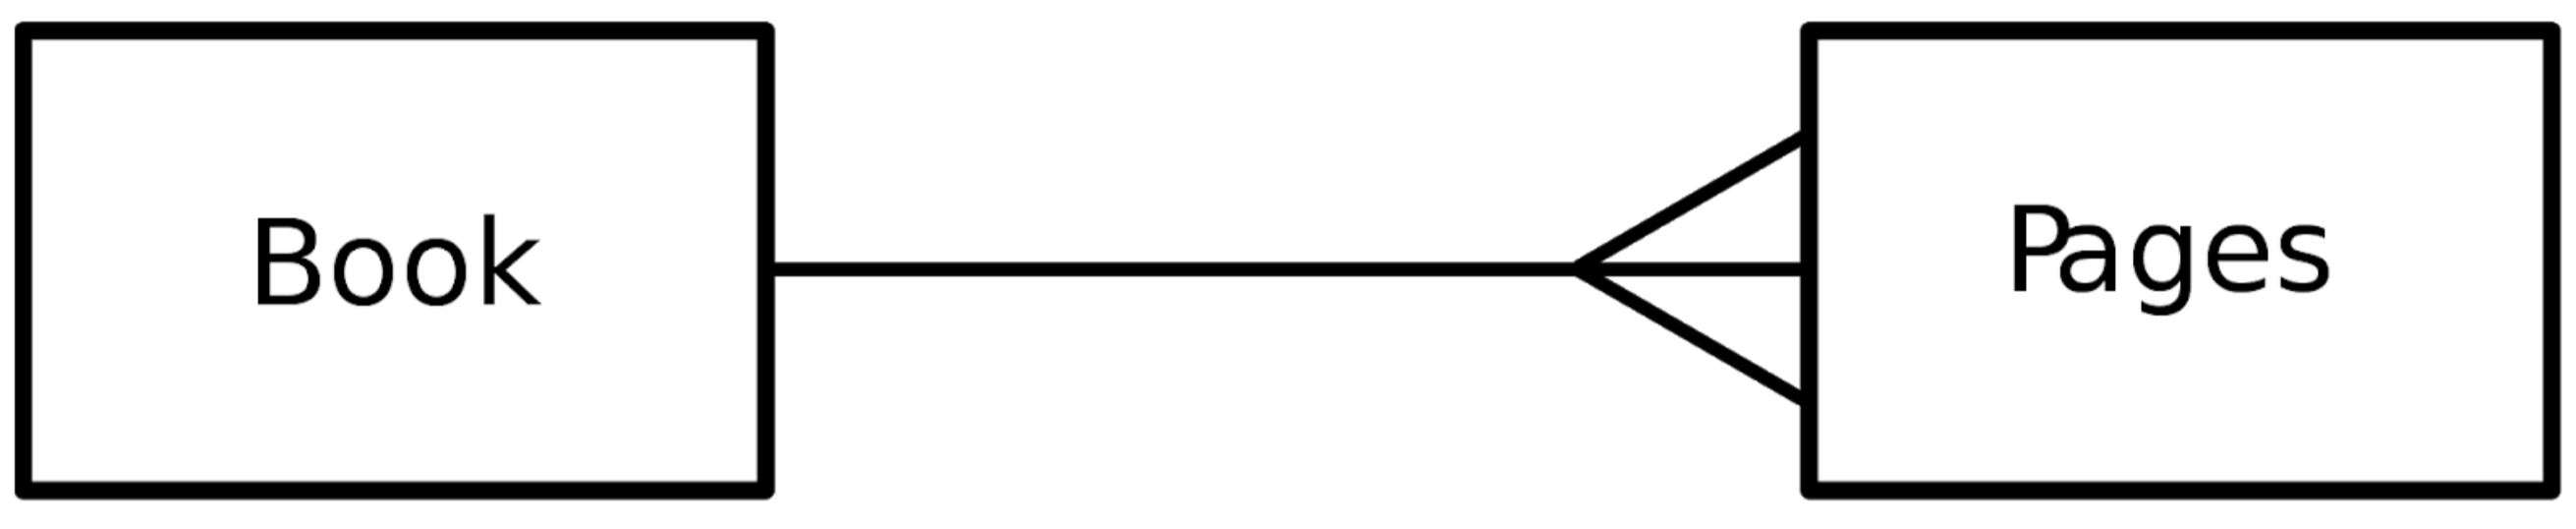

## Создание связи многие-к-одному(ForeignKey)

```python
# articles/models.py
...


class Article(models.Model):
    ...
    category = models.ForeignKey('Category', on_delete=models.SET_NULL, null=True, related_name='articles')


class Category(models.Model):
    ...

```

После не забудем применить изменения к базе данных

```shell
python manage.py makemigrations articles
python manage.py migrate articles
```

Note:
- on_delete - определяет действие, которое будет происходить при удалении родительской модели (Category). https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.ForeignKey.on_delete
- related_name - если мы не зададим свое, то по умолчанию оно будет называться article_set
https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.ForeignKey.related_name

## Обращение к полям модели ForeignKey

- Для начала создадим несколько категории в django shell или админке

```python
from articles.models import Category, Articles

Category.objects.create(name='sport')
Category.objects.create(name='news')
Category.objects.create(name='hot')
```

- И добавим их к нашим статьям в django shell или админке
```python
sport_category = Category.objects.get(name='sport')
article = Article.objects.first()
article.category = sport_category
article.save()
```

- Теперь попробуем обратится ко всем статьям из определенной категории

```python
sport_category = Category.objects.get(name='sport')
sport_category.articles.all()
```

## Задание 2

- Создать таблицу Автор(Author). 
- Автор характеризуется именем(first_name) и фамилией(last_name)
- Зарегистрировать модель в админке.
- Добавить ForeignKey поле автора в таблице статьи(Article)
- Создать два автора(одну через интерпретатор, другую через админку). 
- Добавить каждому по три статьи. 

## Фильтрация по полю в другой таблице

```python
Article.objects.filter(category__name='sport')
```

## Связь Один-к-одному (OneToOne)

Основная задача - дробление большой таблицы(модели) на мелкие составляющие.

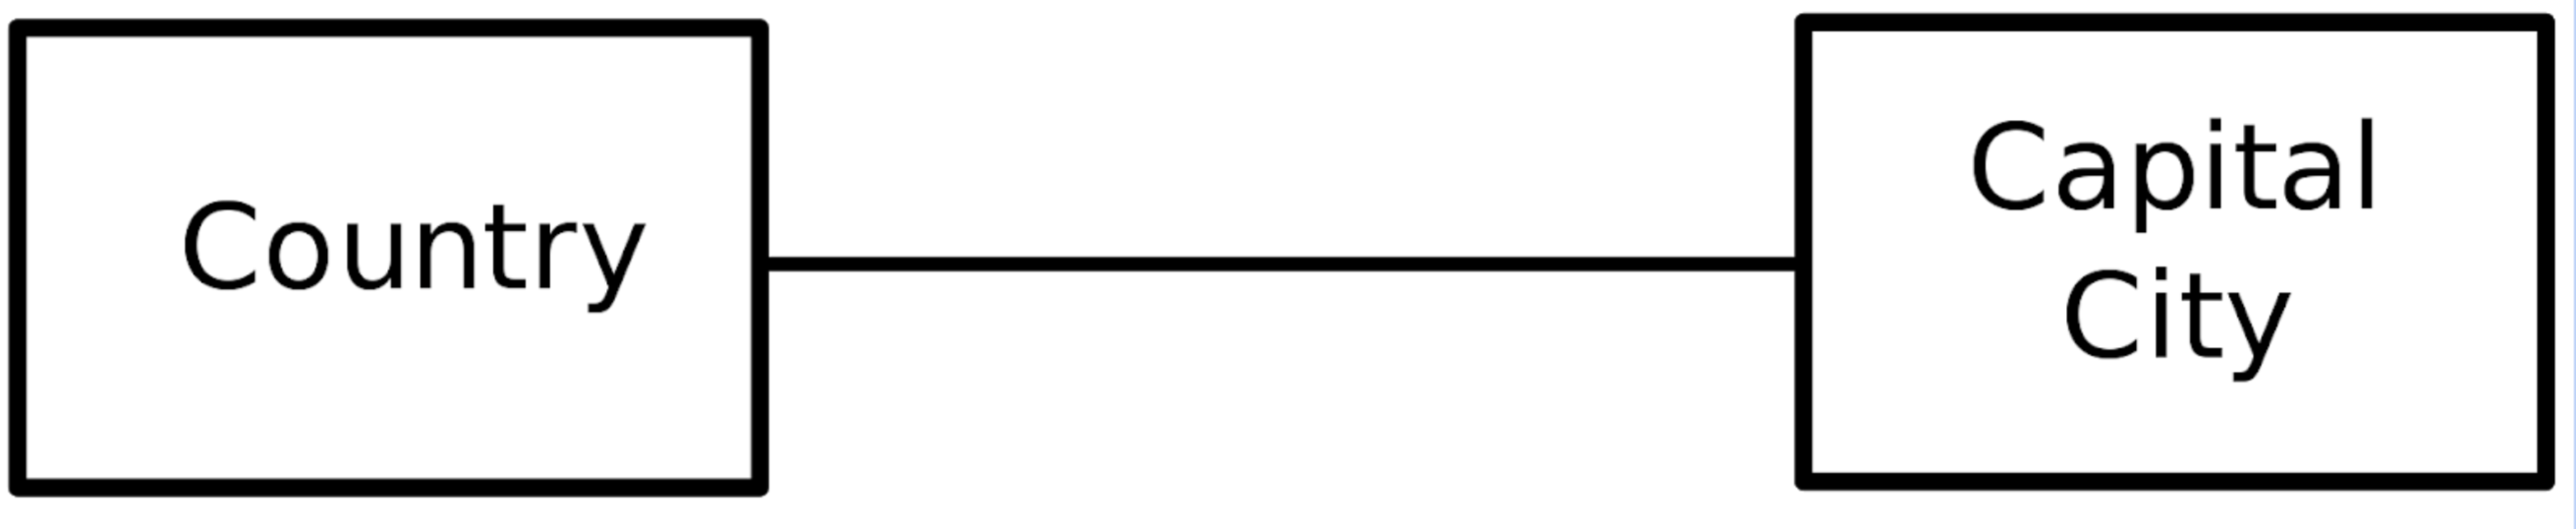

## Добавление связи один-к-одному

```python
# articles/models.py

...

class ContactInfo(models.Model):
    author = models.OneToOneField('Author', on_delete=models.CASCADE, related_name='contact_info')
    phone = models.CharField(max_length=50, null=True, default=None)
    address = models.CharField(max_length=50, null=True, default=None)
```

## Обращение к полям модели OneToOne

```python
author = Author.objects.filter().first()
phone = author.contact_info.phone

contact_info = ContactInfo.objects.filter().first()
first_name = contact_info.author.first_name
```

## Связь многие-ко-многим(ManyToMany)
- Основная задачи: связать множество одних сущностей с множеством других
- Пример: блюда и ингредиенты, студенты и книги.

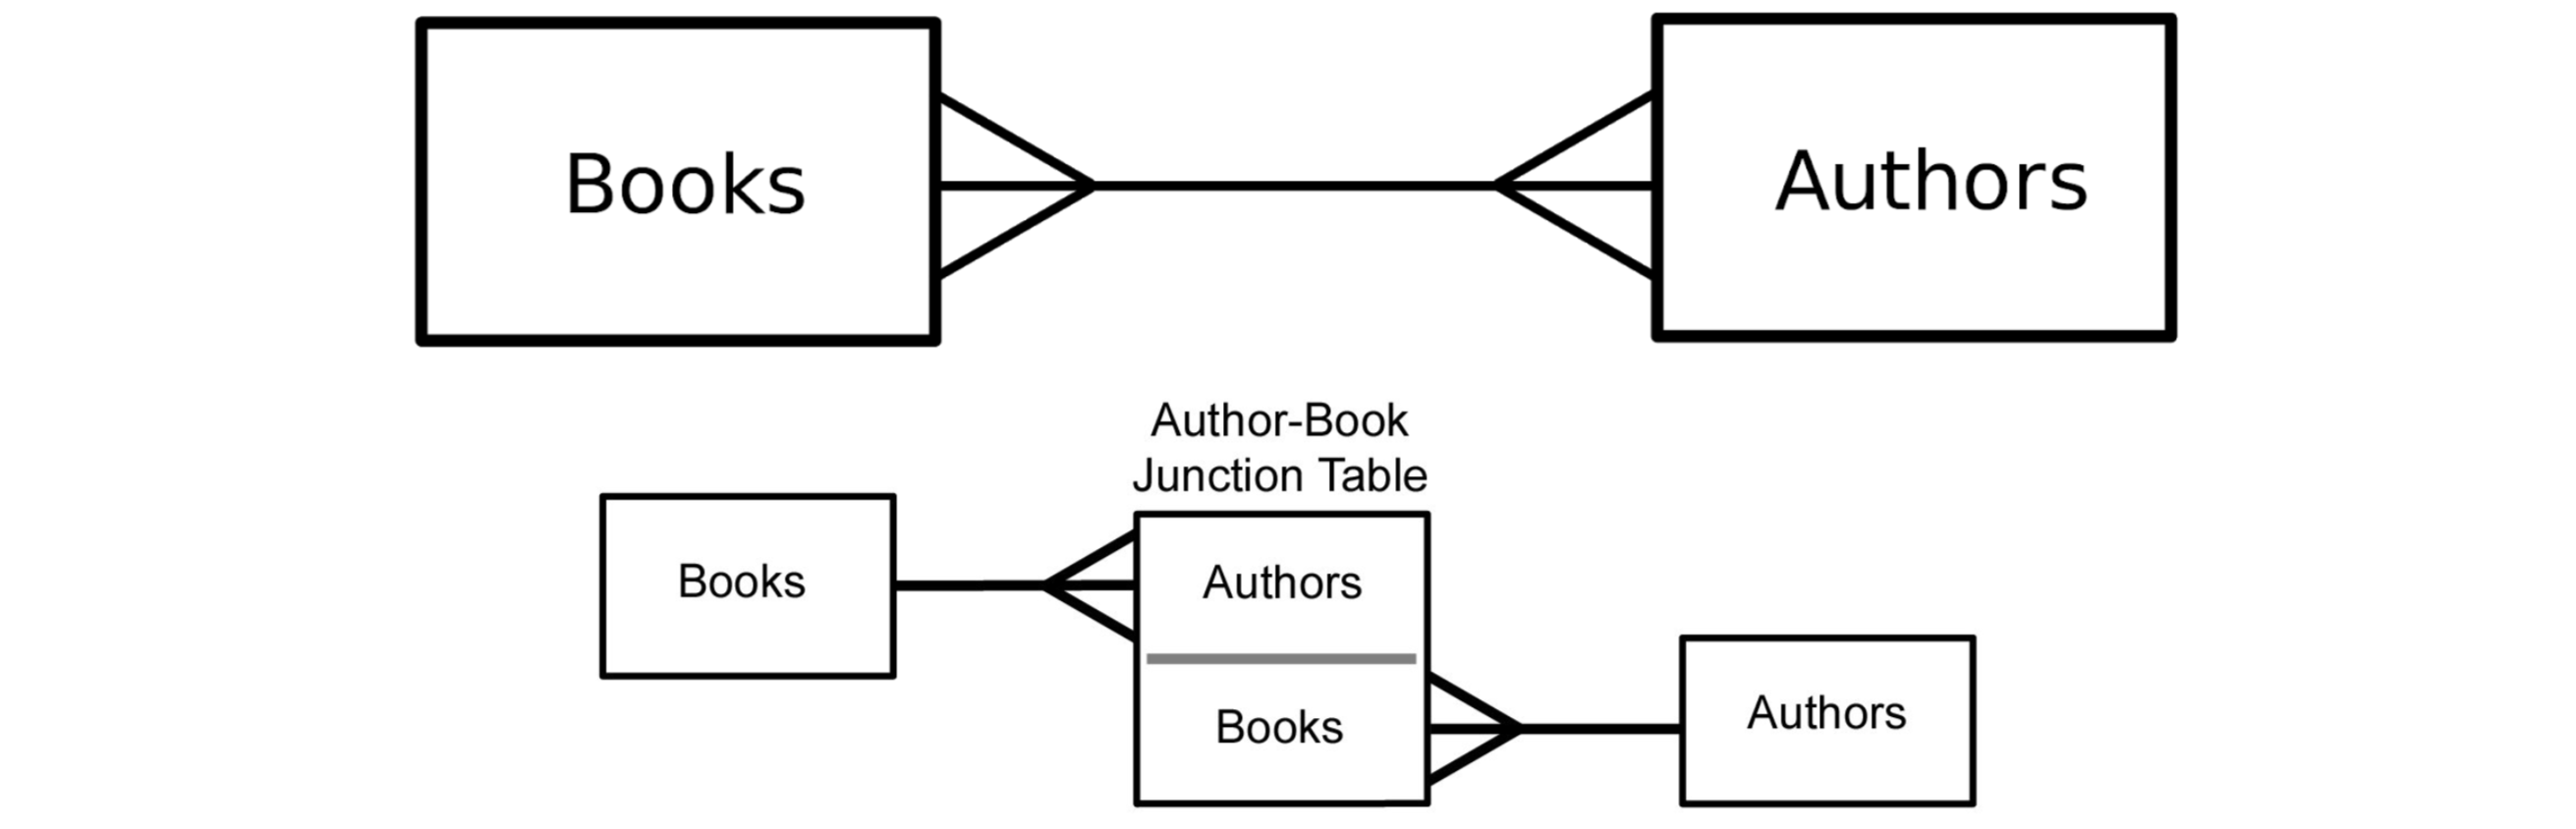

## Создание связи ManyToMany

```python
# articles/models.py

class Author(models.Model):
    ...
    editions = models.ManyToManyField('Edition')


class Edition(models.Model):
    name = models.CharField(max_length=50)
    created_at = models.DateTimeField(auto_now_add=True)
```

Note:
- `DateTimeField` мы затронули впервые. Важный момент здесь это `auto_now_add=True`. Это буквально означает, что при создании записи значения будет автоматически установлено в текущее время
https://docs.djangoproject.com/en/3.2/ref/models/fields/#datetimefield
- К этому моменту у вас уже полностью должен был обновиться файл `articles/admin.py`

```python
# articles/admin.py

from django.contrib import admin

from articles.models import Article, Category, Author, ContactInfo, Edition


admin.site.register(Article)
admin.site.register(Category)
admin.site.register(Author)
admin.site.register(ContactInfo)
admin.site.register(Edition)

```